In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Gradient Descent

In [2]:
X = np.arange(10)
Y = (X-5)**2

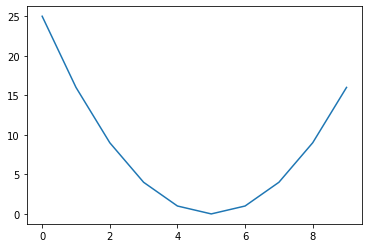

In [3]:
plt.plot(X,Y)
plt.show()

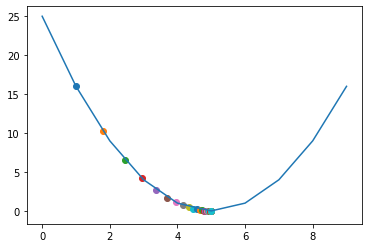

In [4]:
x = 0
lr = 0.1
error = []
plt.plot(X,Y)
for i in range(50):
    grad = 2*(x-5)
    x = x - lr*grad
    y = (x-5)**2
    error.append(y)
    plt.scatter(x,y)
plt.show()
    
    

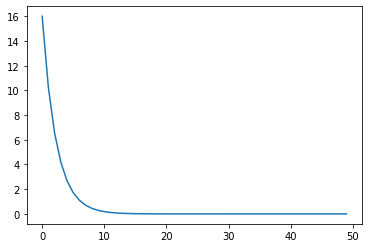

In [5]:
plt.plot(error)
plt.show()

### Lin Reg

In [6]:
X = pd.read_csv('Training Data/Linear_X_Train.csv')
y = pd.read_csv('Training Data/Linear_Y_Train.csv')
X = X.values
y = y.values


In [7]:
def hypothesis(x,theta):
    #theta = [theta0,theta1]
    y_ = theta[0] + theta[1]*x
    return y_
   

In [8]:
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y = Y[i]
        y_ = hypothesis(x,theta)
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

In [9]:
def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
    return total_error/m

In [33]:
def gradientDescent(X,Y,max_steps = 100,lr = 0.1):
    theta = np.zeros((2,))
    errorList = []
    thetaList =[]
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        errorList.append(e)
        theta[0] = theta[0] - grad[0]*lr
        theta[1] = theta[1] - grad[1]*lr
        thetaList.append((theta[0],theta[1]))
    return theta, errorList, thetaList

In [34]:
theta,errorList,thetaList = gradientDescent(X,y)

In [12]:
theta

array([ 3.72687896, 80.54086647])

In [13]:
errorList

[array([6576.35005246]),
 array([5382.10116306]),
 array([4411.49946152]),
 array([3622.60756627]),
 array([2981.36244807]),
 array([2460.09492819]),
 array([2036.32790862]),
 array([1691.80078718]),
 array([1411.67742971]),
 array([1183.90311642]),
 array([998.68240386]),
 array([848.05513558]),
 array([725.55212733]),
 array([625.91553452]),
 array([544.87173451]),
 array([478.94684832]),
 array([425.31688589]),
 array([381.68600791]),
 array([346.18762175]),
 array([317.30402305]),
 array([293.8011006]),
 array([274.67527734]),
 array([259.1103913]),
 array([246.44265199]),
 array([236.13215782]),
 array([227.7397446]),
 array([220.90816592]),
 array([215.34679392]),
 array([210.819181]),
 array([207.13294679]),
 array([204.13155518]),
 array([201.6876277]),
 array([199.69750573]),
 array([198.07682823]),
 array([196.75693483]),
 array([195.6819403]),
 array([194.80635471]),
 array([194.09314753]),
 array([193.51217265]),
 array([193.03888696]),
 array([192.65330781]),
 array([192.3

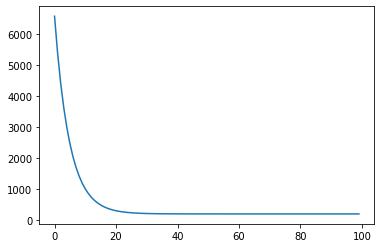

In [14]:
plt.plot(errorList)
plt.show()

In [15]:
y_ = hypothesis(X,theta)


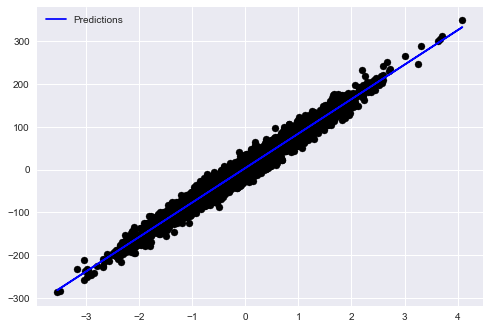

In [16]:
plt.style.use('seaborn')
plt.scatter(X,y,color='black')
plt.plot(X,y_,'b',label='Predictions')
plt.legend()
plt.show()


In [17]:
X_test = pd.read_csv('Test Cases/Linear_X_Test.csv')
y_test = hypothesis(X_test,theta)
X_test.shape

(1250, 1)

In [18]:
a = y_test.to_csv('y-prediction.csv',index=False)

In [19]:
type(y_test)

pandas.core.frame.DataFrame

In [20]:
def r2(Y,Y_):
    num= np.sum((Y-Y_)**2)
    denum = np.sum((Y-Y.mean())**2)
    score = 1 - (num/denum)
    return score*100

In [21]:
r2(y,y_)

97.09612220841039

In [22]:
df.shape

NameError: name 'df' is not defined

In [23]:
y_test.shape

(1250, 1)

In [24]:
y_test.shape

(1250, 1)

In [25]:
df.shape

NameError: name 'df' is not defined

In [26]:
df = pd.DataFrame(data=y_test)
df.rename(columns={"x": "y"})

,y
0,-147.524391
1,-66.265705
2,-200.056206
3,226.036217
4,51.326541
5,-100.621906
6,-12.125819
7,27.251042
8,-62.452996
9,-117.210575


In [27]:
df.to_csv("y_prediction.csv",index=False)

### Visual- Loss function


In [28]:
from mpl_toolkits.mplot3d import Axes3D

In [35]:
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)
T0,T1 = np.meshgrid(T0,T1)
J =np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X+T0[i,j]
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]
print(J.shape)


(80, 80)


In [36]:
#visualise

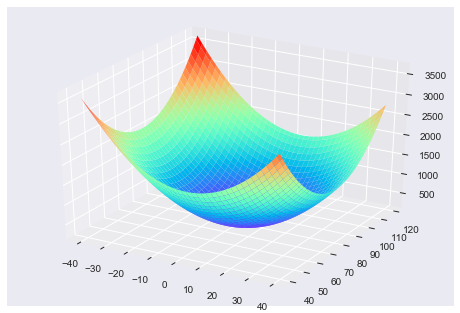

In [37]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()


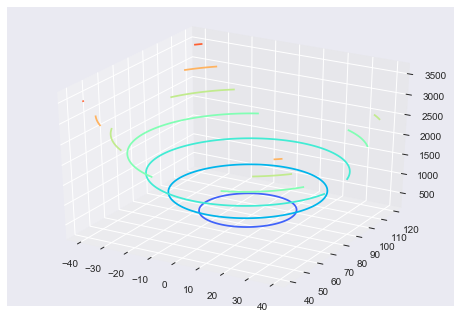

In [38]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

In [39]:
#theta updates

In [43]:
theta_list=np.array(thetaList)

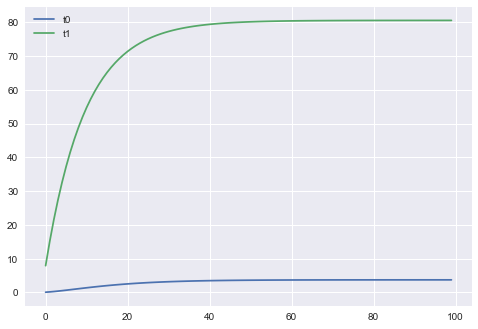

In [44]:
plt.plot(theta_list[:,0],label='t0')
plt.plot(theta_list[:,1],label='t1')
plt.legend()
plt.show()

In [42]:
#trajectory traced by t-updates in loss function

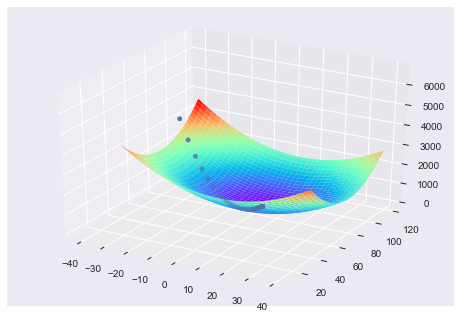

In [45]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],errorList)
plt.show()

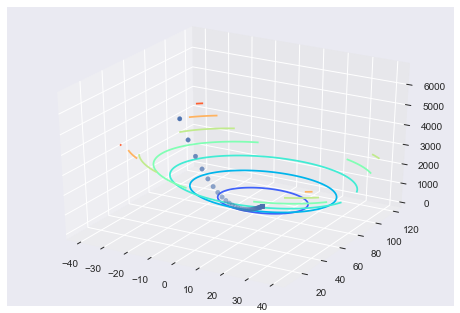

In [46]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],errorList)
plt.show()

In [ ]:
#2d-contour

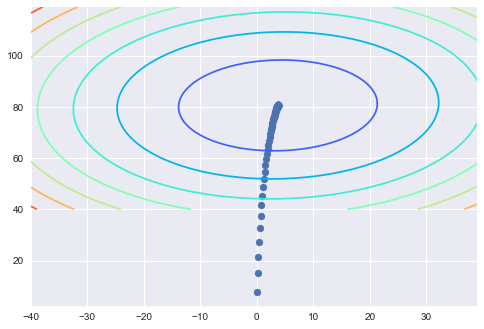

In [47]:
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.contour(T0,T1,J,cmap='rainbow')
plt.show()